# Лабораторная работа 5

Градиентный бустинг с Catboost

Выполнил: 6306, Бамбурова Мария Владимировна

Туториал по использованию библиотеки CatBoost: https://github.com/catboost/tutorials/blob/master/ru/ml_session_2018_tutorial_ru.ipynb

Мастер-класс от Яндекса по CatBoost классификации: https://www.youtube.com/watch?v=xl1fwCza9C8

Установка билиотек:

`pip3 install catboost shap ipywidgets
jupyter nbextension enable --py widgetsnbextension`

0 Подобрать набор данных для классификации (количество классов не имеет значения) и регрессии. Важно наличие числовых и категориальных признаков в данных. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. Можно работать на тех же данных, что и в предыдущей Л.Р.: в этом случае сравнить с результатами лучшего классификатора из предыдущей работы.

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    import catboost
from catboost import *

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor

In [ ]:
import catboost
print(catboost.__version__)

1.0.6


In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
dataset_4t='https://www.kaggle.com/datasets/barelydedicated/bank-customer-churn-modeling'

In [ ]:
data_dirrr ='.\bank-customer-chur'

In [ ]:
od.download(dataset_4t)

Skipping, found downloaded files in ".\bank-customer-churn-modeling" (use force=True to force download)


In [ ]:
import os

In [ ]:
os.listdir(data_dirrr)

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('Churn_Modelling.csv')
display(df)

**ИНФОРМАЦИЯ ПО ДАТАСЕТУ**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  int64  
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.4 MB


1    5457
0    4543
Name: Gender, dtype: int64


[Text(0.5, 1.0, 'Countplot of gender')]

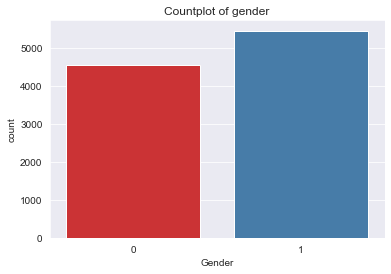

In [ ]:
# classes are well balanced
print(df['Gender'].value_counts())
sns.countplot(x = df['Gender'], data = df, palette='Set1').set(title='Countplot of gender')

In [ ]:
 df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,0,619,0,0,0,2,0.00,0,0,0,101348.88,1
1,2,15647311,1,608,1,0,1,1,83807.86,0,1,0,112542.58,0
2,3,15619304,2,502,0,0,0,8,159660.80,1,0,1,113931.57,1
3,4,15701354,3,699,0,0,2,1,0.00,2,1,1,93826.63,0
4,5,15737888,4,850,1,0,3,2,125510.82,0,0,0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,2539,771,0,1,2,5,0.00,2,0,1,96270.64,0
9996,9997,15569892,606,516,0,1,12,10,57369.61,0,0,0,101699.77,0
9997,9998,15584532,905,709,0,0,18,7,0.00,0,1,0,42085.58,1
9998,9999,15682355,1783,772,2,1,0,3,75075.31,2,0,1,92888.52,1


In [ ]:
df[1:10]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,1,608,1,0,1,1,83807.86,0,1,0,112542.58,0
2,3,15619304,2,502,0,0,0,8,159660.80,1,0,1,113931.57,1
3,4,15701354,3,699,0,0,2,1,0.00,2,1,1,93826.63,0
4,5,15737888,4,850,1,0,3,2,125510.82,0,0,0,79084.10,0
5,6,15574012,5,645,1,1,4,8,113755.78,2,0,1,149756.71,1
6,7,15592531,6,822,0,1,5,7,0.00,2,0,0,10062.80,0
7,8,15656148,7,376,2,0,6,4,115046.74,3,0,1,119346.88,1
8,9,15792365,8,501,0,1,4,4,142051.07,2,1,0,74940.50,0
9,10,15592389,9,684,0,1,7,2,134603.88,0,0,0,71725.73,0


**ЗАДАНИЕ 1**

1  Применить классификатор `CatBoostClassifier` к вашему набору данных. Обратите внимание, что catboost умеет работать с категориальными признаками (параметр `cat_features` - список индексов категориальных признаков), поэтому использование `pd.factorize / pd.get_dummies` здесь лишнее.    
- Вывести итерацию с наилучшим значением AUC (для бинарной классификации) или наилучшим значением Logloss.
- Вывести значения метрик качества классификации на тестовых данных (accuracy и precision / recall / AUC, если применимо).
- В случае бинарной классификации на основе CatBoostClassifier построить кривые PRC и ROC. Вычислить значения PRC-AUC и ROC-AUC.


Примеры классификатора и построения ROC-кривой: https://github.com/catboost/tutorials/blob/master/classification/classification_tutorial.ipynb

In [ ]:
df = df.drop(df[df['Gender'] == '?'].index)
df = df[df[:] != '?'].iloc[:,:] #найдем все пропуски в данных и заменим их на медианный
df.fillna(df.median(),inplace = True)
df["Gender"].unique() #проверим бинарный признак

array([0, 1], dtype=int64)

In [ ]:
import sklearn.model_selection
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [ ]:
y = df["Gender"]
X = df.drop("Gender", axis=1)
cat_features = list([2,4,5,6,8,9,10]) #задаем колонки категориальных признаков
print(cat_features)

[2, 4, 5, 6, 8, 9, 10]


In [ ]:
 X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state = 0
)

In [ ]:
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    loss_function='Logloss',
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose = False

)

print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

Model is fitted: True
Model params:
{'iterations': 100, 'learning_rate': 0.1, 'loss_function': 'Logloss'}


Вывести итерацию с наилучшим значением AUC (для бинарной классификации) или наилучшим значением Logloss

In [ ]:
print('Итерация с наименьшим logloss: ' + str(model.get_best_iteration()))

Итерация с наименьшим logloss: 33


In [ ]:
model.best_score_ #значение на этой итерации

{'learn': {'Logloss': 0.6611014520513718},
 'validation': {'Logloss': 0.683054966100101}}

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(y_test)

9394    0
898     0
2398    0
5906    1
2343    1
       ..
8764    1
4359    0
2041    0
1108    1
3332    1
Name: Gender, Length: 2500, dtype: int64


Вывести значения метрик качества классификации на тестовых данных

In [ ]:
print(sklearn.metrics.classification_report( #смотрим на табличку метрик
    model.predict(X_test), y_test, target_names=["Female", "Male"]
) )

              precision    recall  f1-score   support

      Female       0.24      0.54      0.34       501
        Male       0.83      0.58      0.69      1999

    accuracy                           0.57      2500
   macro avg       0.54      0.56      0.51      2500
weighted avg       0.72      0.57      0.62      2500



Для бинарного классификатора на основе CatBoostClassifier построить кривые PRC и ROC. Вычислить значения PRC-AUC и ROC-AUC.

In [ ]:
from catboost.utils import get_roc_curve
import sklearn.metrics

In [ ]:
eval_pool = Pool(X_test, y_test, cat_features=cat_features) #наподобие класса с конструктором, чтоб передавать удобнее было
curve = get_roc_curve(model, eval_pool)
(fpr, tpr, thresholds) = curve
roc_auc = sklearn.metrics.auc(fpr, tpr)
print('ROC-AUC: ' + str(roc_auc)) #ROC AUC

ROC-AUC: 0.5335349638466068


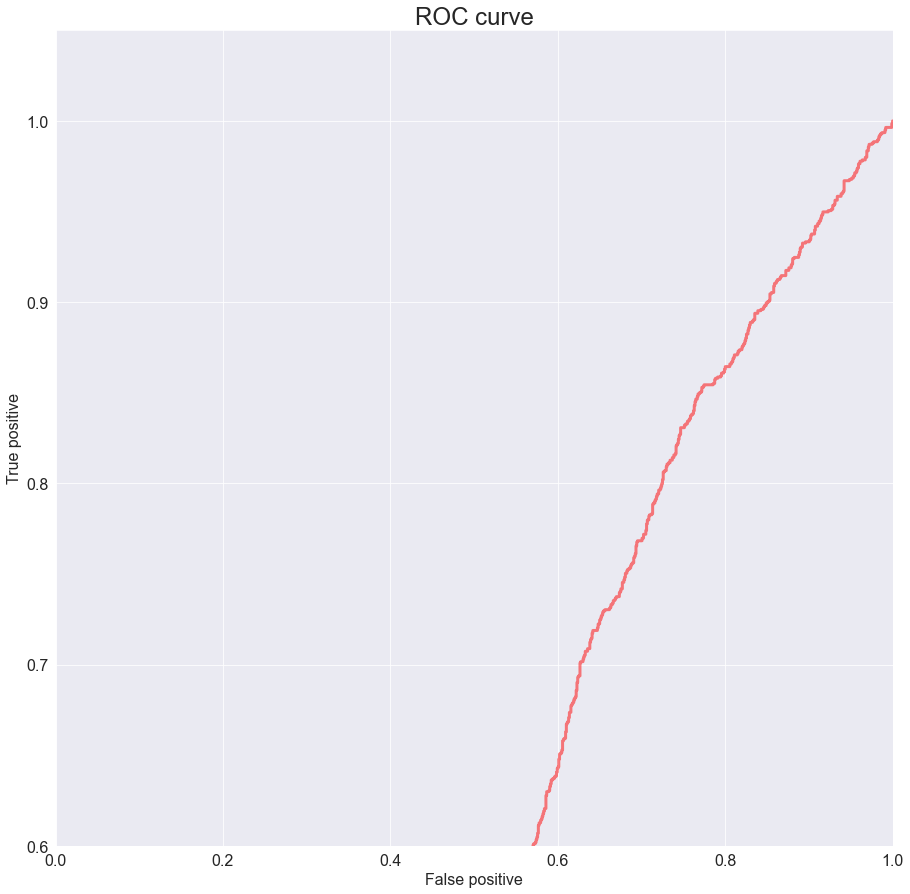

In [ ]:
plt.figure(figsize=(15, 15))

plt.plot(fpr, tpr, color='red', lw=3, label='ROC curve (area = %0.3f)' % roc_auc, alpha=0.5)


plt.xlim([0.0, 1.0]) #настроим область отображения, размеры шрифта, подписи и тд
plt.ylim([0.6, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('False positive', fontsize=16)
plt.ylabel('True positive', fontsize=16)
plt.title('ROC curve', fontsize=24)
plt.show()

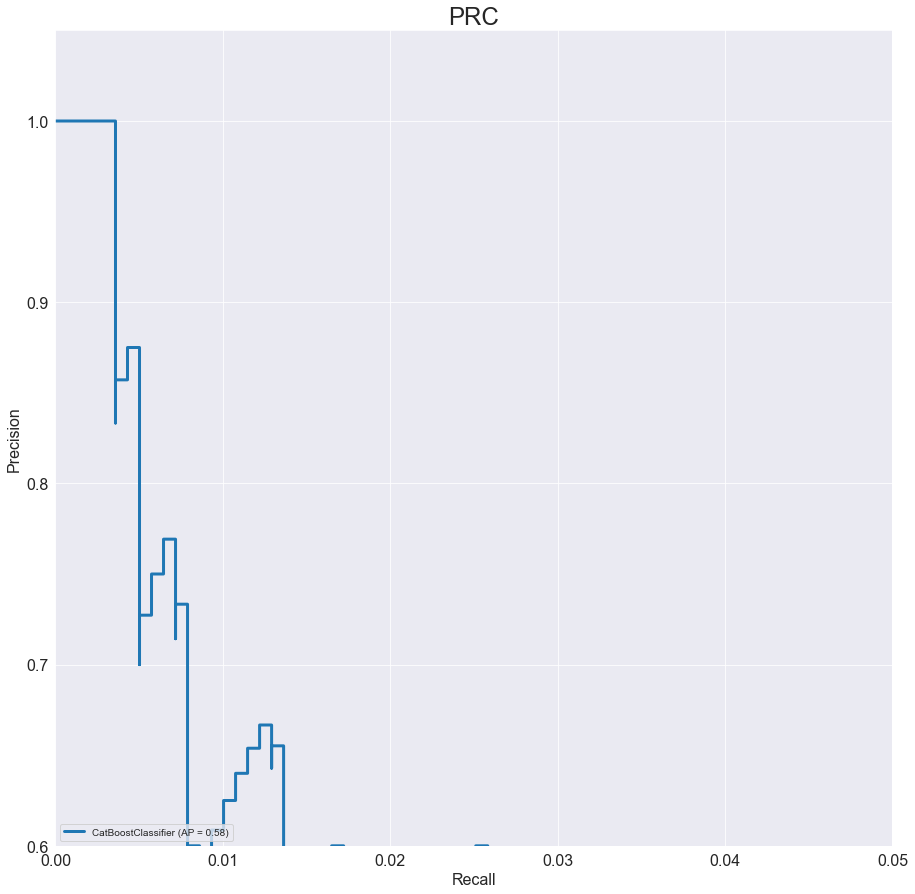

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))


sklearn.metrics.plot_precision_recall_curve(model, X_test, y_test, ax=ax, lw = 3)

plt.xlim([0.0, 0.05])
plt.ylim([0.6, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.title('PRC', fontsize=24)

plt.show()

In [ ]:
s = sklearn.metrics.average_precision_score(pd.factorize(y_test)[0], model.predict_proba(X_test)[:,0]) #RPC AUC
print('RPC-AUC: ' + str(s))

RPC-AUC: 0.5240592068560941


**Задание 2**

2 Применить регрессию CatBoostRegressor к набору данных для регрессии. Вывести номер итерации и значения метрик (MAE и MSE) для наилучшей итерации. Обратите внимание, что в задаче восстановления регрессии целевая переменная имеет непрерывные значения.

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,0,619,0,0,0,2,0.00,0,0,0,101348.88,1
1,2,15647311,1,608,1,0,1,1,83807.86,0,1,0,112542.58,0
2,3,15619304,2,502,0,0,0,8,159660.80,1,0,1,113931.57,1
3,4,15701354,3,699,0,0,2,1,0.00,2,1,1,93826.63,0
4,5,15737888,4,850,1,0,3,2,125510.82,0,0,0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,2539,771,0,1,2,5,0.00,2,0,1,96270.64,0
9996,9997,15569892,606,516,0,1,12,10,57369.61,0,0,0,101699.77,0
9997,9998,15584532,905,709,0,0,18,7,0.00,0,1,0,42085.58,1
9998,9999,15682355,1783,772,2,1,0,3,75075.31,2,0,1,92888.52,1


In [ ]:
data1 = df
col = list(['Surname','Geography','Gender', #запишем в лист все катигориальные колонки
            'Age','NumOfProducts','HasCrCard',
           'IsActiveMember'])

In [ ]:
for num in col: #факторизуем категориальные признаки
    data1[num] = pd.factorize(df[num])[0]

In [ ]:
data1.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,0,619,0,0,0,2,0.00,0,0,0,101348.88,1
1,2,15647311,1,608,1,0,1,1,83807.86,0,1,0,112542.58,0
2,3,15619304,2,502,0,0,0,8,159660.80,1,0,1,113931.57,1


In [ ]:
y_r = data1["Gender"]
X_r = data1.drop("Gender", axis=1)

In [ ]:
X_train_r, X_test_r, y_train_r, y_test_r = sklearn.model_selection.train_test_split(
    X_r, y_r, random_state = 0
)

Вывести номер итерации с значения метрик (MAE и MSE) для наилучшей итерации.

**Для loss function MSE**

In [ ]:
model_r = CatBoostRegressor(iterations=500, learning_rate=0.1, use_best_model=True, loss_function = 'RMSE') #создаем и скармливаем выборку
model_r.fit(X_train_r, y_train_r, verbose=False, eval_set=(X_test_r, y_test_r))

In [ ]:
print('Наилучшая итерация: ' + str(model_r.get_best_iteration())) #наилучшая итерация

Наилучшая итерация: 25


In [ ]:
print('MAE: ' + str(sklearn.metrics.mean_absolute_error(y_test_r, model_r.predict(data=X_test_r))))#считаем метрики
print('MSE: ' + str(sklearn.metrics.mean_squared_error(y_test_r, model_r.predict(data=X_test_r))))

MAE: 0.4897860027036094
MSE: 0.2442537991898972


**Для loss function MAE**

In [ ]:
model_r = CatBoostRegressor(iterations=500, learning_rate=0.1, use_best_model=True, loss_function = 'MAE')
model_r.fit(X_train_r, y_train_r, verbose=False, eval_set=(X_test_r, y_test_r))

In [ ]:
print('Наилучшая итерация: ' + str(model_r.get_best_iteration())) #наилучшая итерация

Наилучшая итерация: 15


In [ ]:
print('MAE: ' + str(sklearn.metrics.mean_absolute_error(y_test_r, model_r.predict(data=X_test_r))))#считаем метрики
print('MSE: ' + str(sklearn.metrics.mean_squared_error(y_test_r, model_r.predict(data=X_test_r))))

MAE: 0.43410494627512214
MSE: 0.37437090404246376
